## Création du filtre de liquidité

- idée : filtre dynamique dans le temps
- À chaque date de rebalancement de référence (dernier jour de trading le janvier, avril, juillet et octobre) on calcule la liquidité moyenne des 3 derniers mois à partir des poids de référence de l'indice et des données de volumes.

In [2]:
import matplotlib.pyplot as plt

# from utils import *
from preprocessing import read_data, read_gics_sectors, read_reference_index_holdings

In [3]:
df_px = read_data("Constituents PX_LAST data")
df_volume = read_data("Constituents PX_VOLUME data")
df_total_ret = read_data("Constituents TOT_RET_INDEX data")
df_gics = read_gics_sectors()
df_ref = read_reference_index_holdings()

In [4]:
df_volume.head()

,AAC/B CN Equity,AAH CN Equity,AAR-U CN Equity,AAV CN Equity,ABX CN Equity,AC CN Equity,ACB CN Equity,ACE/A CN Equity,ACE/B CN Equity,ACM/A CN Equity,...,WTE CN Equity,WTN CN Equity,WTO CN Equity,X CN Equity,XG CN Equity,YLO CN Equity,YRI CN Equity,ZL CN Equity,ZZZ CN Equity,SPTSX Index
Index Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,8750.0,9711.0,NaN,16575.0,926579.0,NaN,NaN,NaN,NaN,21396.0,...,25607.0,NaN,NaN,NaN,NaN,NaN,1804.0,510922.0,NaN,62662940.0
2000-01-05,23285.0,11400.0,NaN,31275.0,1452213.0,NaN,NaN,NaN,NaN,6000.0,...,55081.0,NaN,NaN,NaN,NaN,NaN,3357.0,343030.0,NaN,94698130.0
2000-01-06,29305.0,8783.0,NaN,5150.0,600273.0,NaN,NaN,NaN,NaN,38400.0,...,23580.0,NaN,NaN,NaN,NaN,NaN,2107.0,518189.0,NaN,84015360.0
2000-01-07,13695.0,11620.0,NaN,4555.0,1020813.0,NaN,NaN,NaN,NaN,3400.0,...,34934.0,NaN,NaN,NaN,NaN,NaN,891.0,202823.0,NaN,84001320.0
2000-01-10,16070.0,20453.0,NaN,8384.0,1269818.0,NaN,NaN,NaN,NaN,71800.0,...,19667.0,NaN,NaN,NaN,NaN,NaN,2249.0,278023.0,NaN,78874940.0


In [12]:
df_volume.shape, df_px.shape, df_total_ret.shape, df_gics.shape, df_ref.shape

((5810, 573), (5810, 573), (5830, 573), (572, 2), (61152, 2))

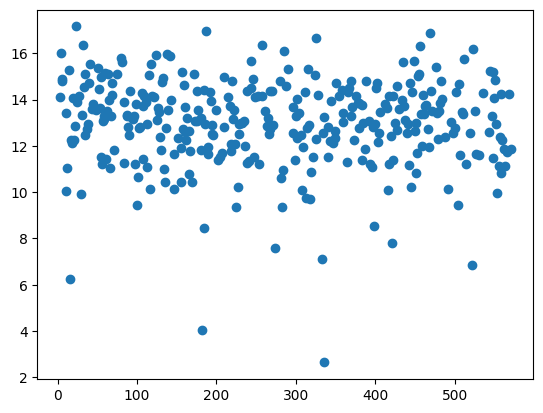

In [14]:
# scatter plot last row of df_volume without last column
plt.scatter(range(df_volume.iloc[-1, :-1].shape[0]), np.log(df_volume.iloc[-1, :-1]))

(array([116.,  57.,  35.,  19.,  17.,  16.,   9.,   6.,   7.,   8.,   3.,
          3.,   7.,   2.,   2.,   2.,   2.,   1.,   0.,   1.,   1.,   2.,
          2.,   0.,   1.,   1.,   0.,   1.,   0.,   2.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([1.40000000e+01, 2.82428020e+05, 5.64842040e+05, 8.47256060e+05,
        1.12967008e+06, 1.41208410e+06, 1.69449812e+06, 1.97691214e+06,
        2.25932616e+06, 2.54174018e+06, 2.82415420e+06, 3.10656822e+06,
        3.38898224e+06, 3.67139626e+06, 3.95381028e+06, 4.23622430e+06,
        4.51863832e+06, 4.8010

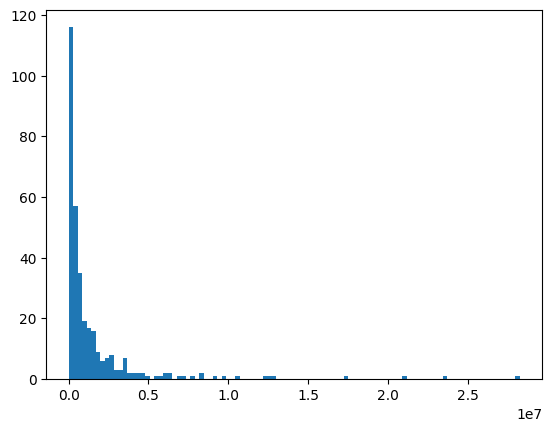

In [16]:
plt.hist(df_volume.iloc[-1, :-1], bins=100)

In [21]:
type(df_volume.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [25]:
# Combien de dates sont égales au 12-31 dans le dataframe ?
# (on veut savoir combien de fois une date termine par le 31 décembre dans le DF
# pour savoir combien de fois on va devoir rebalancer l'indice)
df_volume.index[(df_volume.index.month == 12) & (df_volume.index.day == 31)].value_counts()


2001-12-31    1
2002-12-31    1
2003-12-31    1
2004-12-31    1
2007-12-31    1
2008-12-31    1
2009-12-31    1
2010-12-31    1
2012-12-31    1
2013-12-31    1
2014-12-31    1
2015-12-31    1
2018-12-31    1
2019-12-31    1
2020-12-31    1
2021-12-31    1
Name: Index Date, dtype: int64